#**PROYECTO FINAL**
Nombre : Adriana Gavilan Beltran

In [40]:
import os
import pandas as pd
import numpy as np
import pystan
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
covid_d = pd.read_csv('/content/Casos_positivos_de_COVID-19_en_Colombia.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
covid_d.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [6]:
covid_d = covid_d[covid_d["Nombre municipio"]=="BOGOTA"]

In [7]:
covid_d.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
7,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
8,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
9,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
10,12/3/2020 0:00:00,11,11/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,42,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,31/3/2020 0:00:00,PCR,6.0,NaN


**ANALISIS DESCRIPTIVO**


In [22]:
covid_d.describe()

,casos
count,562.000000
mean,2576.946619
std,2617.292537
min,1.000000
25%,684.000000
50%,1766.000000
75%,3717.750000
max,15569.000000


In [63]:
covid_d.shape

(4944368, 23)

In [8]:
covid_d=covid_d['fecha reporte web'].value_counts()

In [9]:
covid_d=pd.DataFrame({'fecha reporte web':covid_d.index, 'casos':covid_d.values})

In [10]:
covid_d

,fecha reporte web,casos
0,24/6/2021 0:00:00,15569
1,17/6/2021 0:00:00,12493
2,19/6/2021 0:00:00,11729
3,1/7/2021 0:00:00,11545
4,30/6/2021 0:00:00,11493
...,...,...
557,22/3/2020 0:00:00,4
558,12/3/2020 0:00:00,2
559,11/3/2020 0:00:00,2
560,13/3/2020 0:00:00,1


In [11]:
df=covid_d

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   fecha reporte web  562 non-null    object
 1   casos              562 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [24]:
df['fecha reporte web'] = pd.to_datetime(df['fecha reporte web'])
df=df.sort_values(by='fecha reporte web')

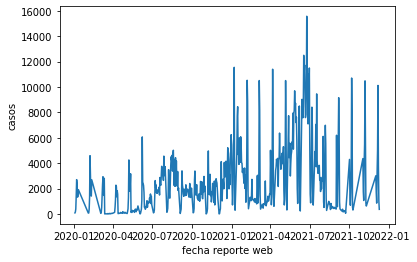

In [25]:
sns.lineplot(data=df,y='casos',x='fecha reporte web')

In [26]:
df_1= np.array(df['casos'].values)
generator = TimeseriesGenerator(df_1,df_1,length=8,batch_size=16)

In [27]:
model =  tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(8,)))
model.add(tf.keras.layers.Dense(4,activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='linear'))

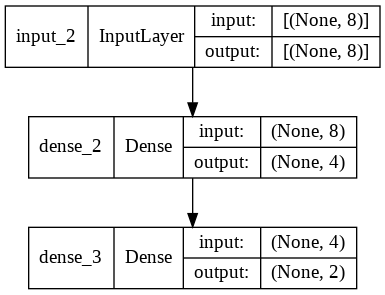

In [28]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [29]:
model.compile(loss='mse',optimizer='adam')

In [30]:
model.fit_generator(generator,epochs=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/300
35/35 [==============================] - 0s 2ms/step - loss: 22488120.0000
Epoch 2/300
35/35 [==============================] - 0s 1ms/step - loss: 19363584.0000
Epoch 3/300
35/35 [==============================] - 0s 2ms/step - loss: 17034498.0000
Epoch 4/300
35/35 [==============================] - 0s 2ms/step - loss: 15180229.0000
Epoch 5/300
35/35 [==============================] - 0s 2ms/step - loss: 13441379.0000
Epoch 6/300
35/35 [==============================] - 0s 2ms/step - loss: 11101029.0000
Epoch 7/300
35/35 [==============================] - 0s 2ms/step - loss: 7632813.5000
Epoch 8/300
35/35 [==============================] - 0s 1ms/step - loss: 5458300.0000
Epoch 9/300
35/35 [==============================] - 0s 1ms/step - loss: 4772873.5000
Epoch 10/300
35/35 [==============================] - 0s 1ms/step - loss: 4556918.0000
Epoch 11/300
35/35 [==============================] - 0s 1ms/step - loss: 4412785.5000
Epoch 12/300
35/35 [==========================

In [31]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
y_pred = model.predict_generator(generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


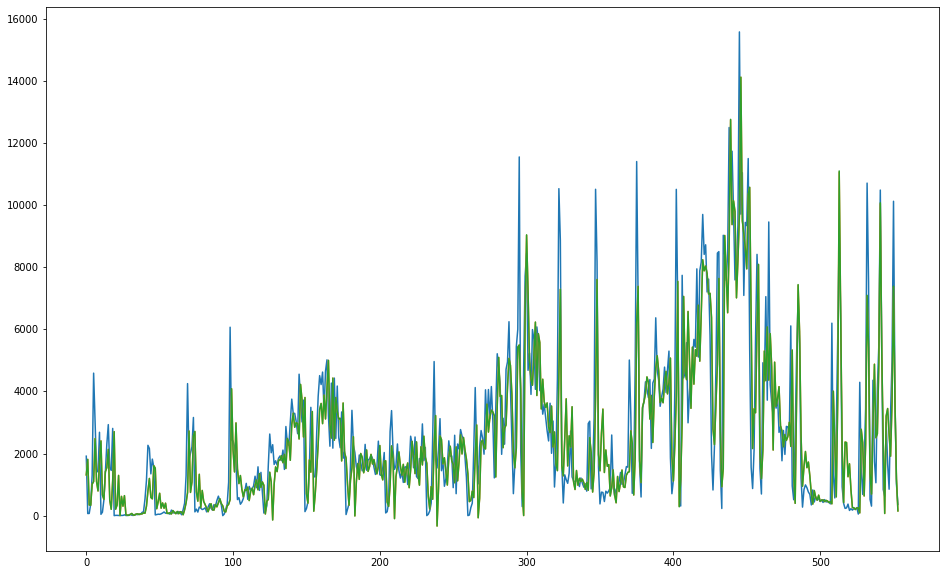

In [62]:
plt.figure(figsize=(16,10))

plt.plot(df_1[8:])

plt.plot(y_pred)